In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../Obesity.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.dtypes

Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

In [5]:
nomes_ajustados=df.columns.tolist()
ajusta_nomes={"FAVC": "Consumo de alimentos com alto teor calórico",
  "FCVC": "Frequência de consumo de vegetais",
    "NCP": "Número de refeições por dia",
      "CAEC": "Consumo de alimentos entre as refeições",
        "SMOKE": "Fuma",
          "SCC": "Consumo de bebidas alcoólicas",
            "FAF": "Frequência de atividade física",
              "TUE": "Tempo gasto em atividades físicas",
                "CALC": "Tempo gasto em atividades sedentárias",
                  "MTRANS": "Meio de transporte utilizado",
                    "CH2O": "Consumo de água diário"
                    }
                    
df.rename(columns=ajusta_nomes, inplace=True)
mapa_obesidade = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}



df['Obesity'] = df['Obesity'].map(mapa_obesidade)

In [6]:
df['Consumo de alimentos entre as refeições'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [7]:
df

,Gender,Age,Height,Weight,family_history,Consumo de alimentos com alto teor calórico,Frequência de consumo de vegetais,Número de refeições por dia,Consumo de alimentos entre as refeições,Fuma,Consumo de água diário,Consumo de bebidas alcoólicas,Frequência de atividade física,Tempo gasto em atividades físicas,Tempo gasto em atividades sedentárias,Meio de transporte utilizado,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,2
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,6


In [8]:
#Separação de X e y
X=df.drop(columns=['Obesity','Weight','Height'],axis=1)
y=df['Obesity']

In [9]:
#Separação de dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:


ordem_categorias=[
    'no',
    'Sometimes',
    'Frequently',
    'Always']

lista_de_ordens = [ordem_categorias,ordem_categorias]



In [11]:

variaveis_numericas=['Age',ajusta_nomes['FCVC'],ajusta_nomes['NCP'],ajusta_nomes['CH2O'],ajusta_nomes['FAF'],ajusta_nomes['TUE']]
variaveis_categoricas = ['Gender', 'family_history', ajusta_nomes['FAVC'],ajusta_nomes['SMOKE'], ajusta_nomes['SCC'],ajusta_nomes['MTRANS']]
variaveis_categorias=[ajusta_nomes['CAEC'],ajusta_nomes['CALC']]



scaler_step=ColumnTransformer(
    transformers=[
        #variaveis numericas
        ('scaler',StandardScaler(),variaveis_numericas),

     
        #variaveis categoricas sem ordem
        ('categorical',OrdinalEncoder(),variaveis_categoricas),

        #variaveis categoricas com ordem
        ('categorical_order',OrdinalEncoder(categories=lista_de_ordens),variaveis_categorias)
],
    remainder='passthrough'

)


In [12]:
#Criando o pipeline


model_pipeline=Pipeline([
        ('scaling',scaler_step),
        ('model',RandomForestClassifier(n_estimators=100,random_state=42))    
        
        ])

In [13]:
#treina  o modelo e calcula a media so do X_train
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age',
                                                   'Frequência de consumo de '
                                                   'vegetais',
                                                   'Número de refeições por '
                                                   'dia',
                                                   'Consumo de água diário',
                                                   'Frequência de atividade '
                                                   'física',
                                                   'Tempo gasto em atividades '
                                                   'físicas']),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  ['Gender', 'family_history',
                                                   'Consumo de alimentos com '
                                                   'alto teor calórico',
                                                   'Fuma',
                                                   'Consumo de bebidas '
                                                   'alcoólicas',
                                                   'Meio de transporte '
                                                   'utilizado']),
                                                 ('categorical_order',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]),
                                                  ['Consumo de alimentos entre '
                                                   'as refeições',
                                                   'Tempo gasto em atividades '
                                                   'sedentárias'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [14]:
#Avaliando o modelo

y_pred = model_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acuracia (assertividade): {acc:.2%}')
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.65      0.71      0.68        62
           2       0.79      0.73      0.76        56
           3       0.82      0.64      0.72        50
           4       0.86      0.83      0.84        78
           5       0.85      0.95      0.89        58
           6       1.00      1.00      1.00        63

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.83      0.83      0.83       423



In [15]:
cm = confusion_matrix(y_test, y_pred)

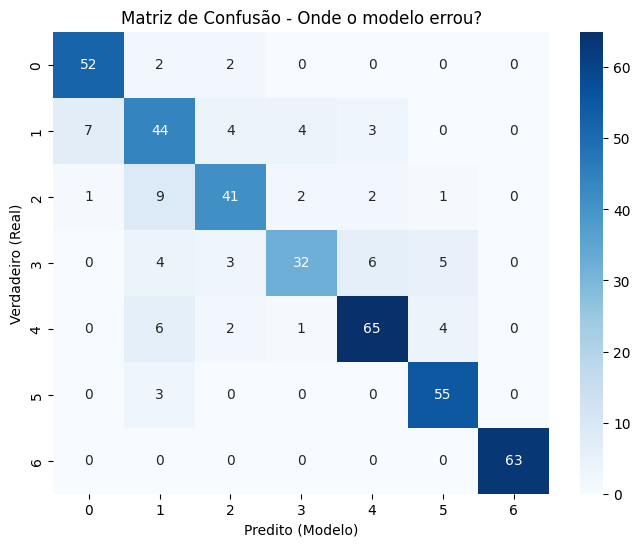

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Verdadeiro (Real)')
plt.xlabel('Predito (Modelo)')
plt.title('Matriz de Confusão - Onde o modelo errou?')
plt.show()

apos o teste do modelo no data set ppercebemos um alto indice de erro entre os primeiros cinco grupos


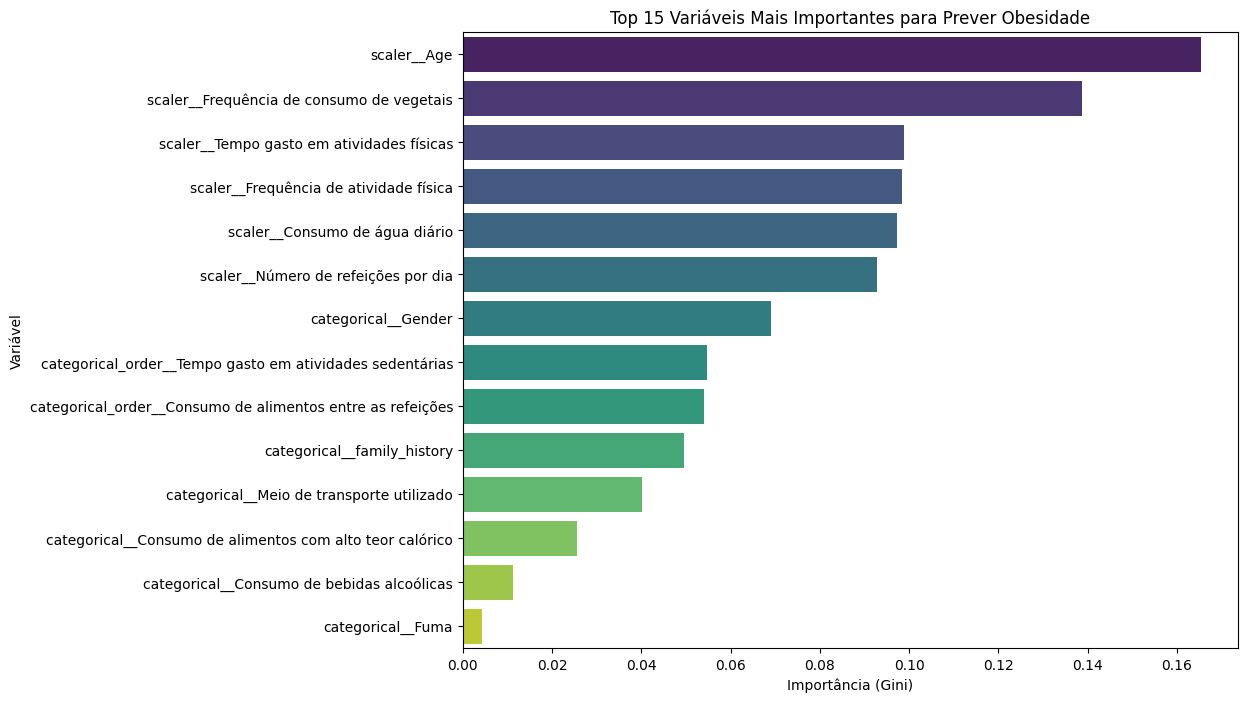

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Acessar os passos internos do Pipeline
# 'model' e 'scaling' são os nomes que demos no passo anterior
step_modelo = model_pipeline.named_steps['model']
step_preprocessor = model_pipeline.named_steps['scaling']

# 2. Pegar a Importância (Números)
importancias = step_modelo.feature_importances_

# 3. Pegar os Nomes das Colunas (Texto)
# O método get_feature_names_out() garante que a ordem bate com a do modelo
nomes_features = step_preprocessor.get_feature_names_out()

# 4. Criar um DataFrame para organizar
df_importance = pd.DataFrame({
    'Feature': nomes_features,
    'Importance': importancias
})

# 5. Ordenar do maior para o menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# 6. Plotar
plt.figure(figsize=(10, 8))
sns.barplot(data=df_importance.head(15), x='Importance', y='Feature', palette='viridis',hue='Feature', dodge=False)
plt.title('Top 15 Variáveis Mais Importantes para Prever Obesidade')
plt.xlabel('Importância (Gini)')
plt.ylabel('Variável')
plt.show()

Podemos observar que apos idade e genero, temos que a vvairavel relacvcionada a atividade fiscia vem em primerio sendo seguida por NCP que indica sobre dieta

In [18]:
import numpy as np

Gerando gráfico de Dependência Parcial (Causa e Efeito)...


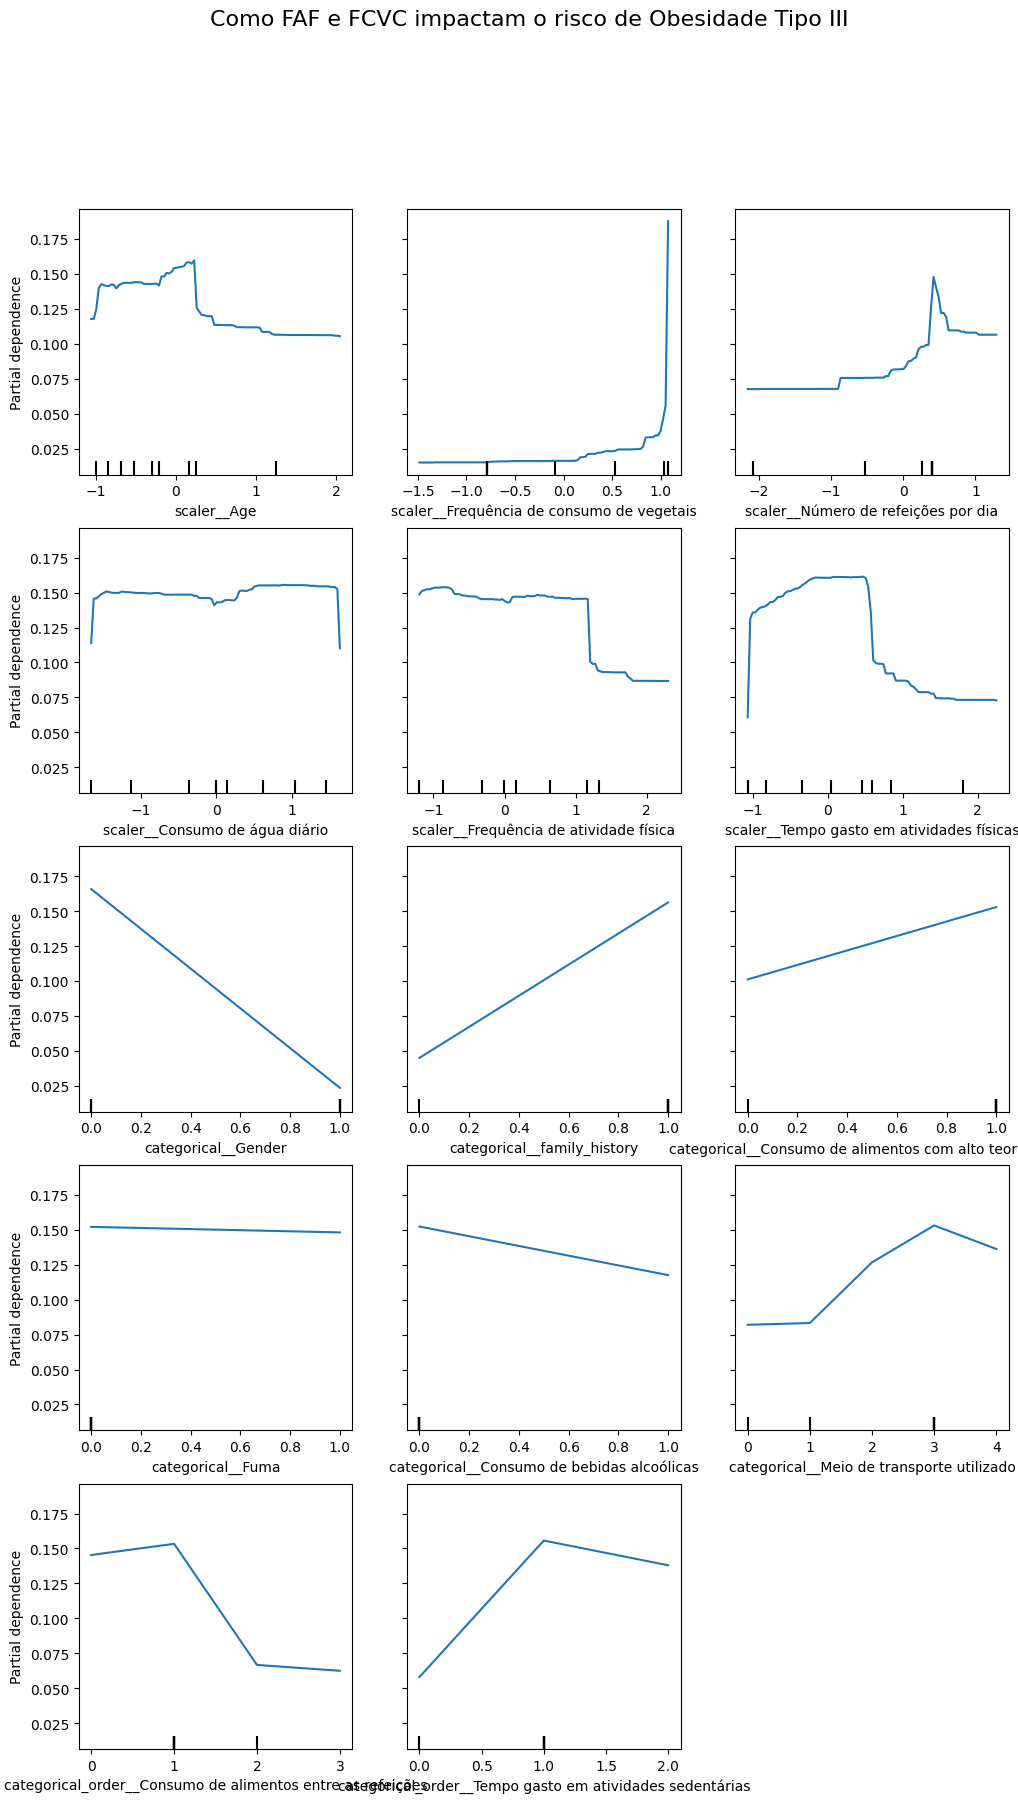

In [19]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 1. Configurar o que queremos ver
# Vamos ver o impacto da "Atividade Física" (FAF) e "Vegetais" (FCVC)
features_para_ver = ['num__FAF', 'num__FCVC'] 

# Precisamos pegar os nomes corretos que saíram do transformer
# Se der erro de nome, imprima 'nomes_features' para conferir
nomes_features = step_preprocessor.get_feature_names_out()

print("Gerando gráfico de Dependência Parcial (Causa e Efeito)...")

# 2. Plotar
fig, ax = plt.subplots(figsize=(12, 20))

# A classe 6 é a Obesidade Tipo III (o caso grave)
# Se o seu modelo for binário ou diferente, ajuste o target.
display = PartialDependenceDisplay.from_estimator(
    step_modelo,                # Sua Random Forest
    step_preprocessor.transform(X_test), # Seus dados transformados
    features=nomes_features, # Vamos varrer pelos índices
    feature_names=nomes_features, # Nomes das colunas
    target=6, # Focando na Classe 6 (Obesidade Grave)

    ax=ax
)

plt.suptitle('Como FAF e FCVC impactam o risco de Obesidade Tipo III', fontsize=16)
plt.show()


### OBSERVAÇÕES

* GRÁFICO DE FREQUENCIA DE ATIVIDADE FISICA
LINHA DESCENDENTE MOSTRA QAUE AO AUMENTAR A FREQUENCIA DE ATIVIDADE FISICA É A MANEIRA MAIS EFICAZ DE DIMINUIR A CHANCE DE OBSIDADE III
COMBATE O SEDENTARISMO É O FATOR PRINCIPAL PARA A LUTA CONTRA A OBSE4GIDADE III

* HISTÓRICO FAMILIAR
UMA LINHA QUASE VERTIFCAQL QUE APONTA QUE 0 = NÃO TEM HISTORICO, REDUZ PARA MENOS DE 0.025 DE CHANCE DE SEDENTARISMO 
E 1= POSSUI HISTORICO A PROB SOBE PARA 1.75


* CONTRASTE, CONSUMO DE ALIMENTOS SAUDAVEIS

    <FONTSIZE=10> O GRAFICO MOSTRA QUE AUMENTA A QUANTIDADE DE CONSUMO E AUMENTA A PROB DE SER OBS III
    """Hipótese: Pessoas que já estão com obesidade severa (Tipo III) tendem a responder que comem muitos vegetais porque estão constantemente tentando fazer dieta ou por "desejabilidade social" (vergonha de admitir que não comem). O modelo aprendeu o padrão dos dados, mas os dados refletem a psicologia do paciente, não a biologia."""</FONTSIZE>

* Gênero (remainder__Gender): A linha desce (assumindo 0=Feminino, 1=Masculino). Mostra que, neste dataset, mulheres têm maior prevalência de Obesidade Tipo III.

* Idade (scaler__Age): O risco explode na juventude e estabiliza na vida adulta.

* Alimentos Calóricos
: Confirmação do óbvio, o que é bom! Mostra que o modelo está "são" e alinhado com a realidade nutricional. Quem come mais "junk food" (FAVC) tem risco linearmente maior.



In [20]:
import joblib

# Salvando o pipeline completo
joblib.dump(model_pipeline,'..\obesity_model_pipeline.joblib')



['..\\obesity_model_pipeline.joblib']